# Dataset Information:
The dataset consists of mortality rate data categorized by type and year. It comprises 198 entries.

# Dataset columns:
**1. Type:** Describes the category or type of mortality rate.

**2. Year:** Represents the year for which the mortality rate data is recorded.

**3. Mortality Rate:** Indicates the mortality rate corresponding to the specific type and year.


# Data Types:
- object: Categorical data type (Type  column).
- int64: Integer data type.(Year column)
- float64: Floating-point numeric data type.(Mortality Rate)

# Missing values:
In the dataset, there are no missing values (indicated by '0' under each column) in any of the columns. The 'Type' column contains categorical data describing the type of mortality rate, the 'Year' column contains numerical data representing the year of observation, and the 'Mortality Rate' column contains numerical data indicating the mortality rate corresponding to each type and year.




In [ ]:
import warnings
warnings.filterwarnings('ignore')  # Ignore warnings

import numpy as np  # Numerical operations
import pandas as pd  # Data manipulation
import matplotlib.pyplot as plt  # Data visualization

In [3]:
df = pd.read_csv('/kaggle/input/nchs-infant-and-neonatal-us-1915-2013/NCHS_-_Infant_and_neonatal_mortality_rates__United_States__1915-2013.csv')
df

,Type,Year,Mortality Rate
0,Infant,1915,99.9
1,Infant,1916,101.0
2,Infant,1917,93.8
3,Infant,1918,100.9
4,Infant,1919,86.6
...,...,...,...
193,Neonatal,2009,4.2
194,Neonatal,2010,4.0
195,Neonatal,2011,4.1
196,Neonatal,2012,4.0


In [4]:
df.shape

(198, 3)

In [5]:
df.head(10)

,Type,Year,Mortality Rate
0,Infant,1915,99.9
1,Infant,1916,101.0
2,Infant,1917,93.8
3,Infant,1918,100.9
4,Infant,1919,86.6
5,Infant,1920,85.8
6,Infant,1921,75.6
7,Infant,1922,76.2
8,Infant,1923,77.1
9,Infant,1924,70.8


In [6]:
df.tail(10)

,Type,Year,Mortality Rate
188,Neonatal,2004,4.5
189,Neonatal,2005,4.5
190,Neonatal,2006,4.4
191,Neonatal,2007,4.4
192,Neonatal,2008,4.3
193,Neonatal,2009,4.2
194,Neonatal,2010,4.0
195,Neonatal,2011,4.1
196,Neonatal,2012,4.0
197,Neonatal,2013,4.0


In [7]:
df.describe()

,Year,Mortality Rate
count,198.00000,198.000000
mean,1964.00000,25.085354
std,28.64982,21.618767
min,1915.00000,4.000000
25%,1939.25000,7.625000
50%,1964.00000,19.100000
75%,1988.75000,33.950000
max,2013.00000,101.000000


In [8]:
df.isnull().sum()

Type              0
Year              0
Mortality Rate    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            198 non-null    object 
 1   Year            198 non-null    int64  
 2   Mortality Rate  198 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.8+ KB


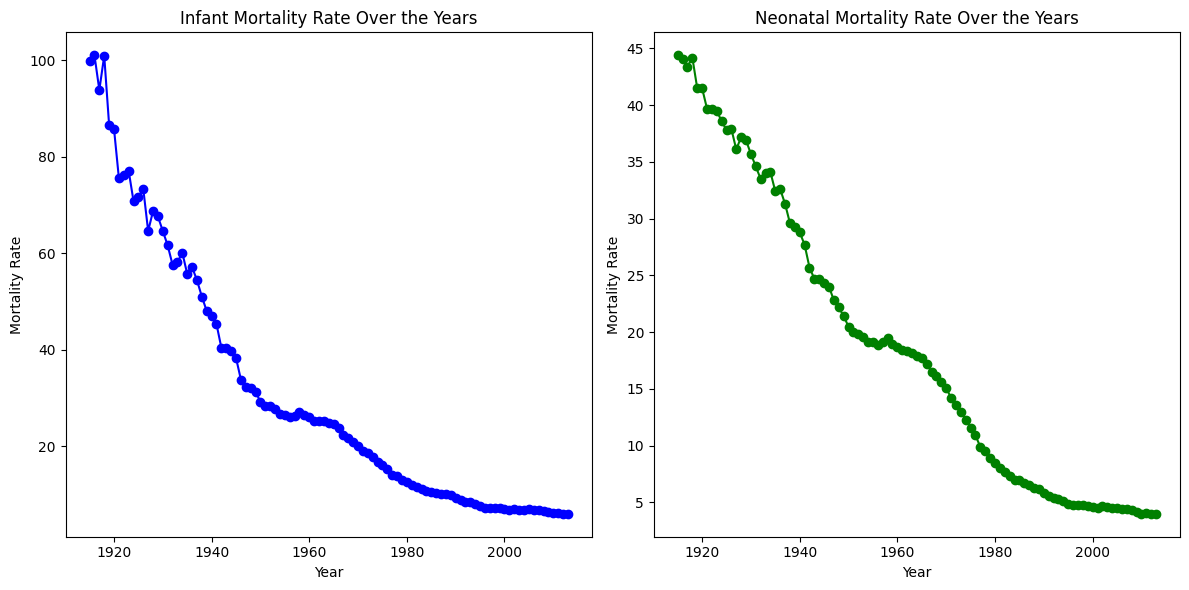

In [10]:
infant_mortality = df[df['Type'] == 'Infant']
neonatal_mortality = df[df['Type'] == 'Neonatal']

# Create side-by-side line plots
plt.figure(figsize=(12, 6))

# Plotting Infant Mortality Rate
plt.subplot(1, 2, 1)
plt.plot(infant_mortality['Year'], infant_mortality['Mortality Rate'], marker='o', color='blue')
plt.title('Infant Mortality Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Mortality Rate')

# Plotting Neonatal Mortality Rate
plt.subplot(1, 2, 2)
plt.plot(neonatal_mortality['Year'], neonatal_mortality['Mortality Rate'], marker='o', color='green')
plt.title('Neonatal Mortality Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Mortality Rate')

plt.tight_layout()
plt.show()

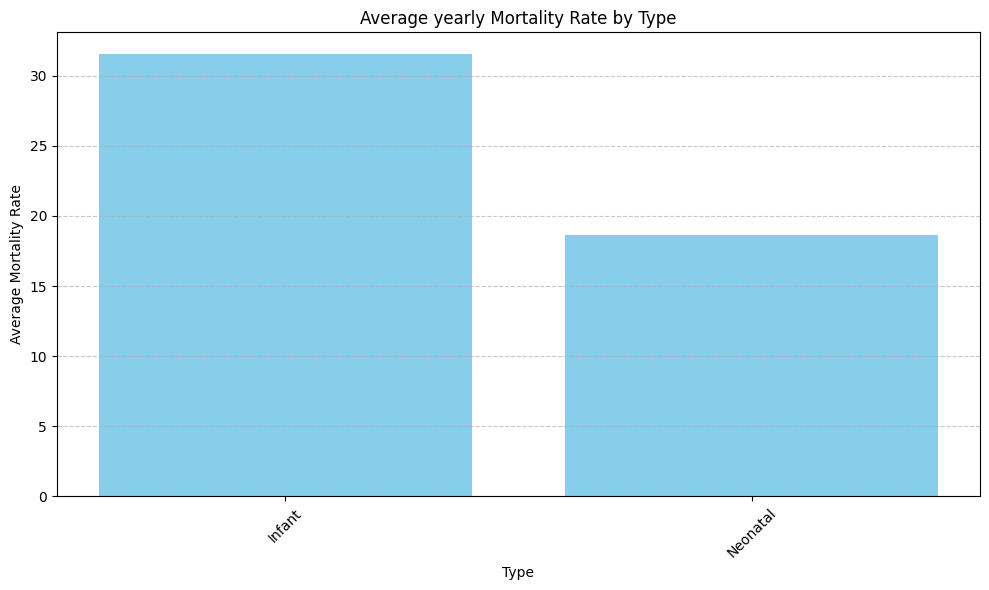

In [11]:
# Grouping by 'Type' and calculating the average mortality rate
avg_mortality_by_type = df.groupby('Type')['Mortality Rate'].mean().reset_index()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(avg_mortality_by_type['Type'], avg_mortality_by_type['Mortality Rate'], color='skyblue')
plt.xlabel('Type')
plt.ylabel('Average Mortality Rate')
plt.title('Average yearly Mortality Rate by Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better visualization
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

<Figure size 1000x600 with 0 Axes>

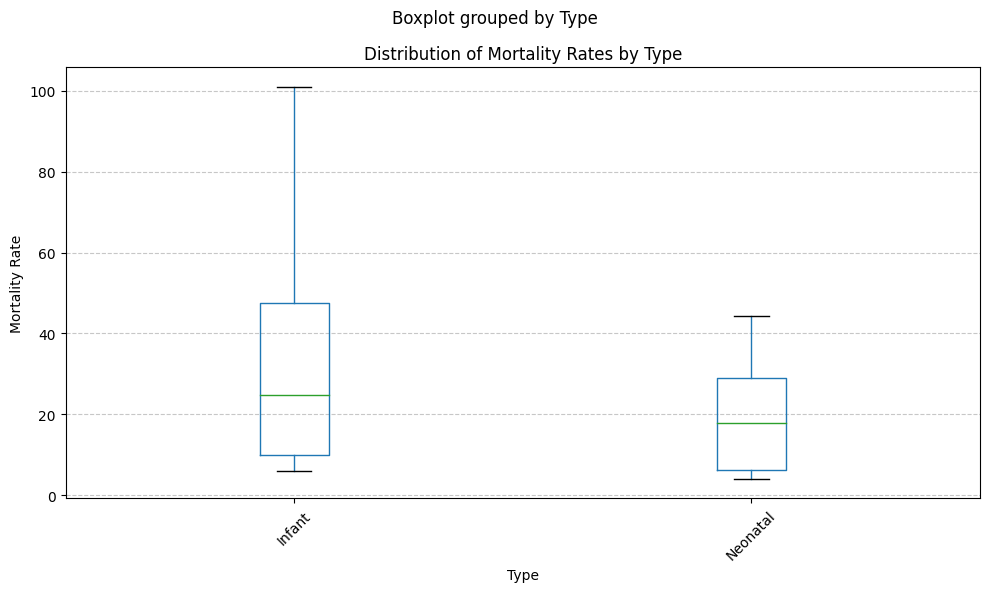

In [12]:
# Plotting the box plot
plt.figure(figsize=(10, 6))
df.boxplot(column='Mortality Rate', by='Type', figsize=(10,6), grid=False)
plt.title('Distribution of Mortality Rates by Type')
plt.xlabel('Type')
plt.ylabel('Mortality Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better visualization
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

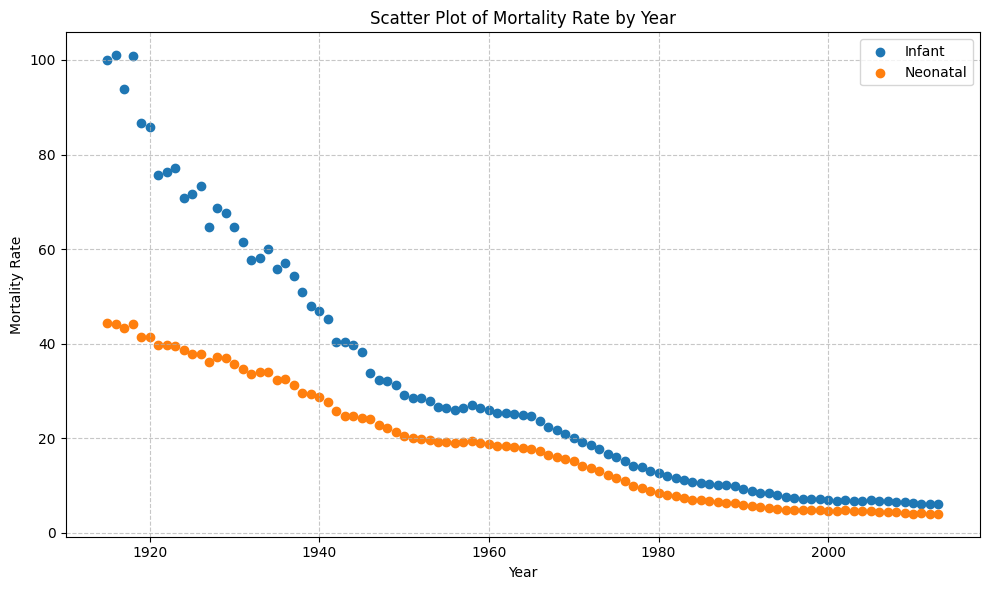

In [13]:
# Separate data for each type and plot the scatter plot without loop
plt.figure(figsize=(10, 6))
grouped_data = df.groupby('Type')

# Plotting each group's scatter plot
for group_name, group_data in grouped_data:
    plt.scatter(group_data['Year'], group_data['Mortality Rate'], label=group_name)

plt.title('Scatter Plot of Mortality Rate by Year')
plt.xlabel('Year')
plt.ylabel('Mortality Rate')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid lines for better visualization
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

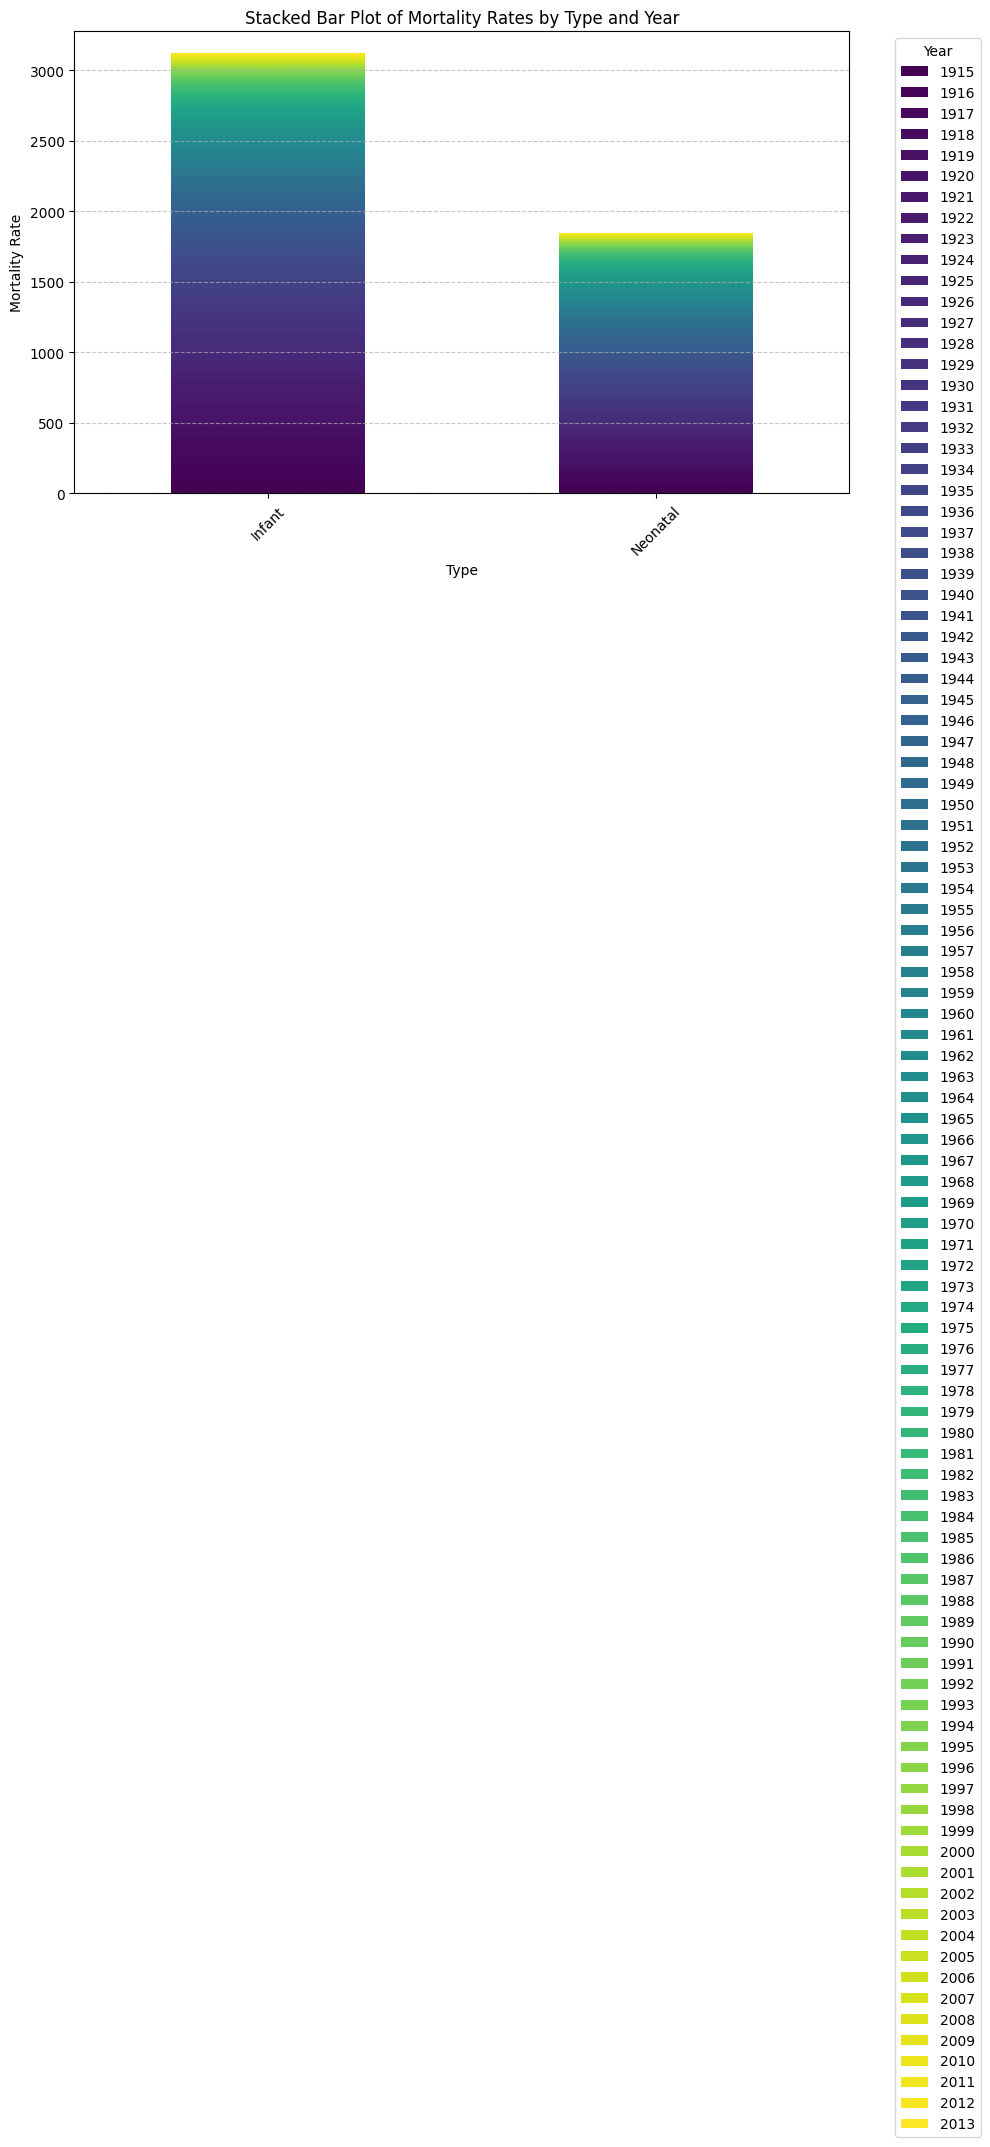

In [14]:
# Pivot the DataFrame to prepare for the stacked bar plot
pivot_df = df.pivot(index='Type', columns='Year', values='Mortality Rate')

# Plotting the stacked bar plot
plt.figure(figsize=(10, 6))
pivot_df.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
plt.title('Stacked Bar Plot of Mortality Rates by Type and Year')
plt.xlabel('Type')
plt.ylabel('Mortality Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better visualization
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

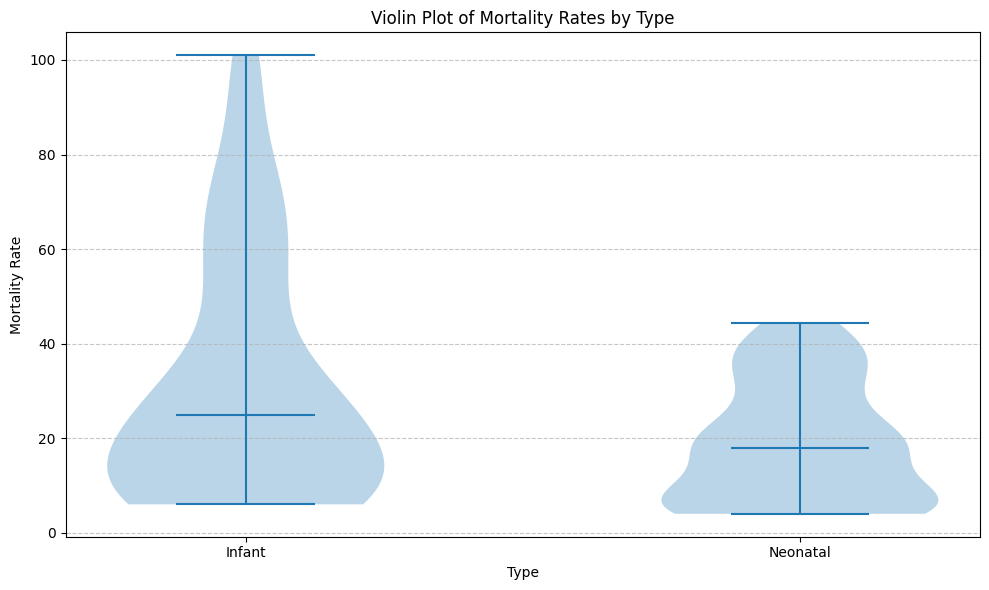

In [15]:

# Plotting the violin plot
plt.figure(figsize=(10, 6))

# Separate data for each type
types = df['Type'].unique()

# Creating a violin plot for all types at once without loop
data = [df[df['Type'] == type_]['Mortality Rate'] for type_ in types]
plt.violinplot(data, positions=range(1, len(types) + 1), showmeans=False, showmedians=True)

plt.title('Violin Plot of Mortality Rates by Type')
plt.xlabel('Type')
plt.ylabel('Mortality Rate')
plt.xticks(range(1, len(types) + 1), types)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better visualization
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()